In [12]:
#Task1: Data Preparation
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [13]:
df=pd.read_csv("C:\\Users\\Susheel Baral\\Downloads\\Internship\\Telco_Customer_Churn_Dataset  (3).csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
print(df.shape)

(7043, 21)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [17]:
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [18]:
df = df.drop("customerID", axis=1)

In [19]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [20]:
#converting categorical variables into numerical representations
from sklearn.preprocessing import LabelEncoder

binary_cols = ["gender", "Partner", "Dependents", "PhoneService", 
               "PaperlessBilling", "Churn"]

le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

In [21]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [22]:
#One-Hot Encoding
multi_cols = ["MultipleLines", "InternetService", "OnlineSecurity",
              "OnlineBackup", "DeviceProtection", "TechSupport",
              "StreamingTV", "StreamingMovies", "Contract", "PaymentMethod"]

df = pd.get_dummies(df, columns=multi_cols, drop_first=True)

In [23]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.5,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False


In [24]:
# Target variable
y = df["Churn"]

# Features
X = df.drop("Churn", axis=1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (5634, 30)
Testing set shape: (1409, 30)


In [26]:
#Task2:EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

In [27]:
# Churn rate calculation
churn_rate = df['Churn'].mean() * 100
print(f"Overall Churn Rate: {churn_rate:.2f}%")

Overall Churn Rate: 26.54%


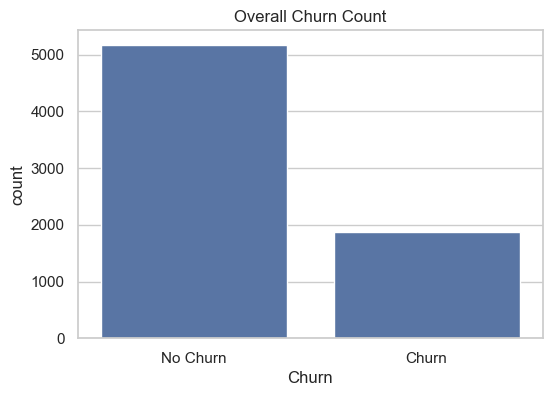

In [28]:
# Visualization
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title('Overall Churn Count')
plt.xticks([0,1], ['No Churn', 'Churn'])
plt.show()

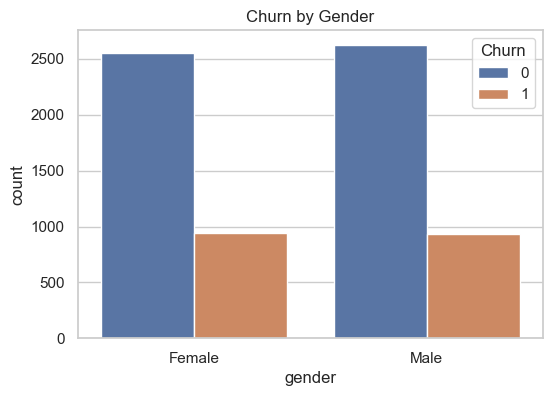

In [29]:
plt.figure(figsize=(6,4))
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Churn by Gender')
plt.xticks([0,1], ['Female', 'Male'])
plt.show()

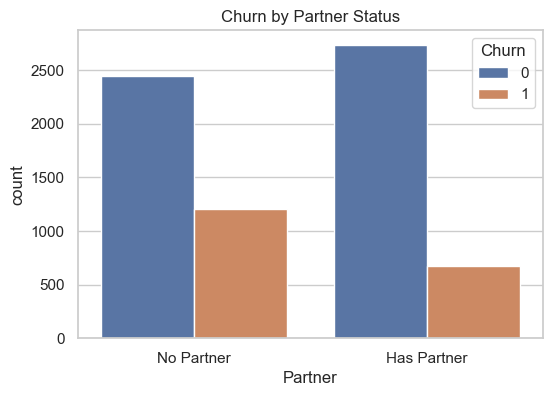

In [30]:
plt.figure(figsize=(6,4))
sns.countplot(x='Partner', hue='Churn', data=df)
plt.title('Churn by Partner Status')
plt.xticks([0,1], ['No Partner', 'Has Partner'])
plt.show()

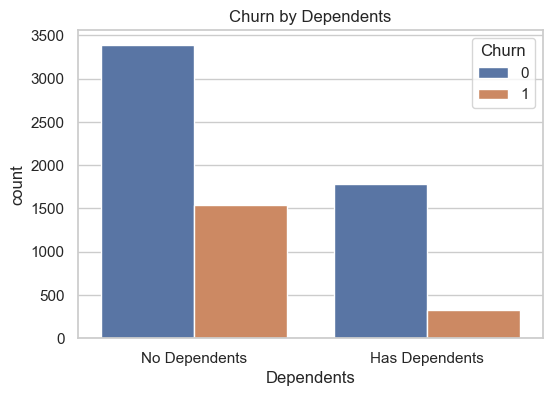

In [31]:
plt.figure(figsize=(6,4))
sns.countplot(x='Dependents', hue='Churn', data=df)
plt.title('Churn by Dependents')
plt.xticks([0,1], ['No Dependents', 'Has Dependents'])
plt.show()

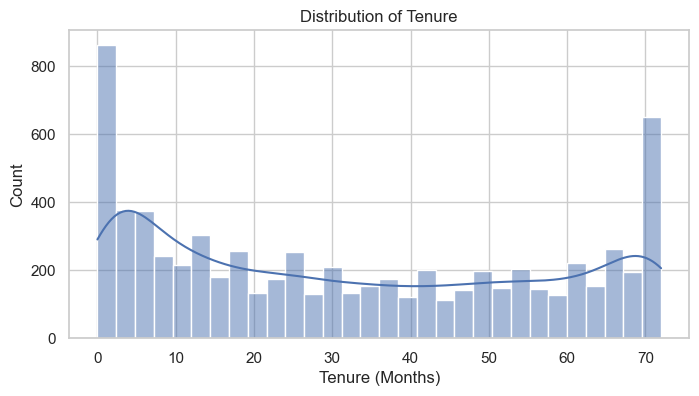

In [32]:
plt.figure(figsize=(8,4))
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (Months)')
plt.show()

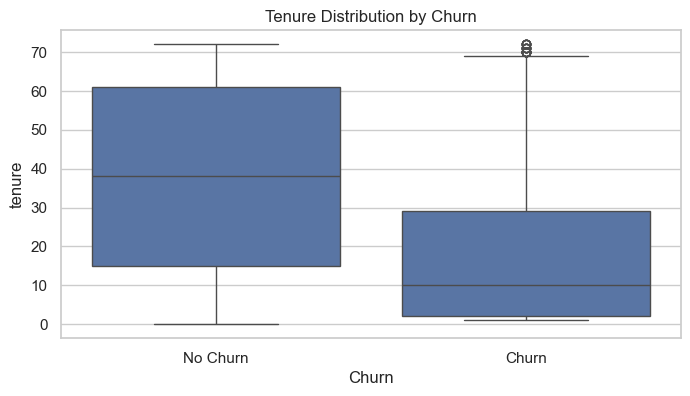

In [33]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure Distribution by Churn')
plt.xticks([0,1], ['No Churn', 'Churn'])
plt.show()

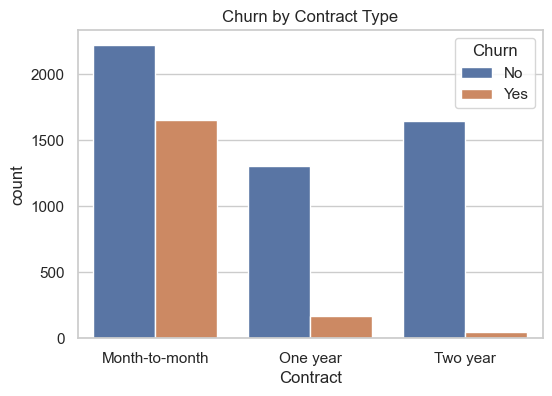

In [35]:
plt.figure(figsize=(6,4))
sns.countplot(x='Contract', hue='Churn', data=pd.read_csv("C:\\Users\\Susheel Baral\\Downloads\\Internship\\Telco_Customer_Churn_Dataset  (3).csv"))
plt.title('Churn by Contract Type')
plt.show()

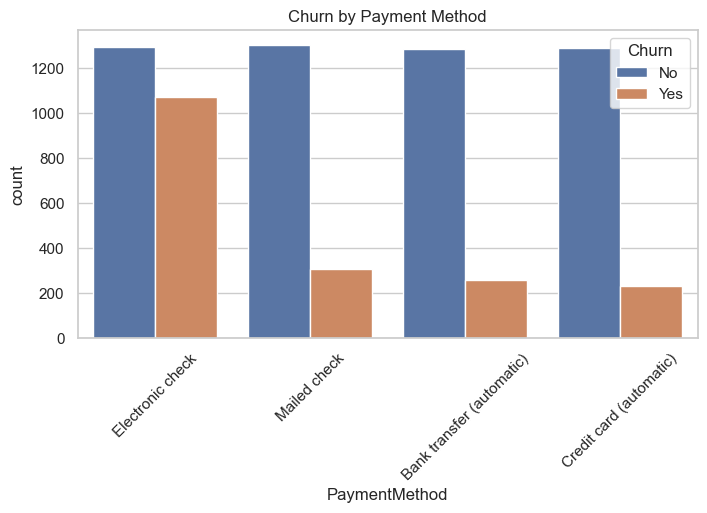

In [37]:
plt.figure(figsize=(8,4))
sns.countplot(x='PaymentMethod', hue='Churn', data=pd.read_csv("C:\\Users\\Susheel Baral\\Downloads\\Internship\\Telco_Customer_Churn_Dataset  (3).csv"))
plt.xticks(rotation=45)
plt.title('Churn by Payment Method')
plt.show()

Task2 Conclusion:

“Churn is higher among month-to-month contracts.”

“Customers with longer tenure churn less.”

“Electronic check users have higher churn.”

Task 3: Customer Segmentation

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# Reloading original data for contract type
df_original = pd.read_csv("C:\\Users\\Susheel Baral\\Downloads\\Internship\\Telco_Customer_Churn_Dataset  (3).csv")

# Merging the contract type with the encoded dataframe
df_seg = df.copy()
df_seg['Contract'] = df_original['Contract']

In [40]:
def tenure_segment(tenure):
    if tenure <= 12:
        return '0-12 months'
    elif tenure <= 24:
        return '13-24 months'
    elif tenure <= 48:
        return '25-48 months'
    elif tenure <= 60:
        return '49-60 months'
    else:
        return '61+ months'

df_seg['TenureSegment'] = df_seg['tenure'].apply(tenure_segment)


In [41]:
def charges_segment(charges):
    if charges < 35:
        return 'Low'
    elif charges <= 70:
        return 'Medium'
    else:
        return 'High'

df_seg['MonthlyChargesSegment'] = df_seg['MonthlyCharges'].apply(charges_segment)

Churn rate by Tenure Segment:
 TenureSegment
0-12 months     47.438243
13-24 months    28.710938
25-48 months    20.388959
49-60 months    14.423077
61+ months       6.609808
Name: Churn, dtype: float64


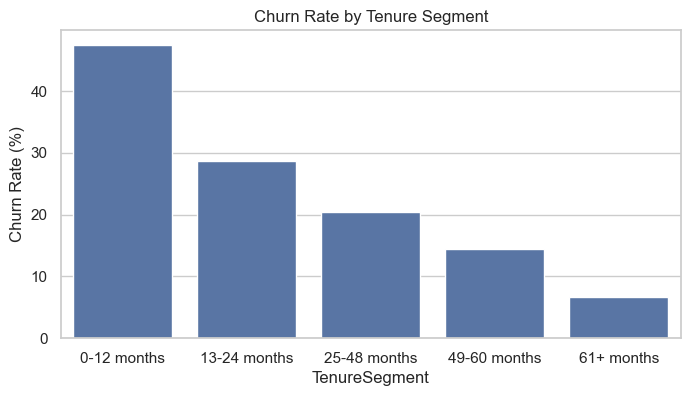

In [42]:
tenure_churn = df_seg.groupby('TenureSegment')['Churn'].mean() * 100
print("Churn rate by Tenure Segment:\n", tenure_churn)

plt.figure(figsize=(8,4))
sns.barplot(x=tenure_churn.index, y=tenure_churn.values)
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Tenure Segment')
plt.show()

Churn rate by Monthly Charges Segment:
 MonthlyChargesSegment
High      35.361429
Low       10.860774
Medium    23.944477
Name: Churn, dtype: float64


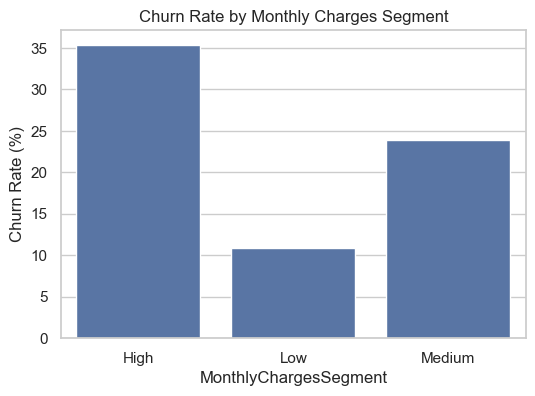

In [43]:
charges_churn = df_seg.groupby('MonthlyChargesSegment')['Churn'].mean() * 100
print("Churn rate by Monthly Charges Segment:\n", charges_churn)

plt.figure(figsize=(6,4))
sns.barplot(x=charges_churn.index, y=charges_churn.values)
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Monthly Charges Segment')
plt.show()

Churn rate by Contract Type:
 Contract
Month-to-month    42.709677
One year          11.269518
Two year           2.831858
Name: Churn, dtype: float64


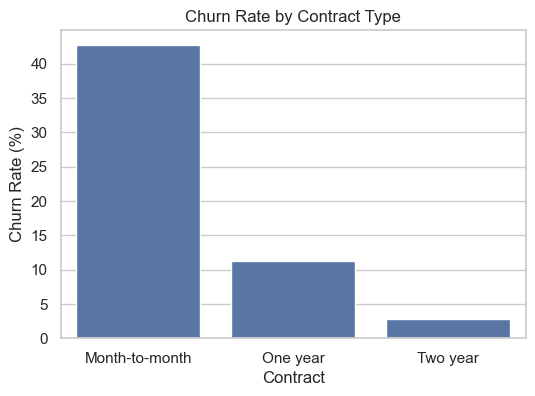

In [44]:
contract_churn = df_seg.groupby('Contract')['Churn'].mean() * 100
print("Churn rate by Contract Type:\n", contract_churn)

plt.figure(figsize=(6,4))
sns.barplot(x=contract_churn.index, y=contract_churn.values)
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Contract Type')
plt.show()

In [45]:
high_value_risk = df_seg[(df_seg['MonthlyChargesSegment'] == 'High') & (df_seg['Churn'] == 1)]
print("High-value customers at risk of churn:", high_value_risk.shape[0])
high_value_risk.head()

High-value customers at risk of churn: 1267


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract,TenureSegment,MonthlyChargesSegment
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,True,False,Month-to-month,0-12 months,High
5,0,0,0,0,8,1,1,99.65,820.5,1,...,False,True,False,False,False,True,False,Month-to-month,0-12 months,High
8,0,0,1,0,28,1,1,104.80,3046.05,1,...,False,True,False,False,False,True,False,Month-to-month,25-48 months,High
13,1,0,0,0,49,1,1,103.70,5036.3,1,...,False,True,False,False,False,False,False,Month-to-month,49-60 months,High
26,1,0,1,1,47,1,1,99.35,4749.15,1,...,False,True,False,False,False,True,False,Month-to-month,25-48 months,High


In [46]:
high_value_risk_contract = high_value_risk.groupby('Contract')['Churn'].count()
print(high_value_risk_contract)

Contract
Month-to-month    1105
One year           125
Two year            37
Name: Churn, dtype: int64


Task3 Conclusion:
1. Churn by Tenure Segment

Observation: Usually, customers with short tenure (0–12 months) have the highest churn rate, while long-tenure customers (49+ months) churn less.

Conclusion: New customers are more likely to leave — focus on improving onboarding, support, and engagement during the first year.

2. Churn by Monthly Charges Segment

Observation: Customers with High Monthly Charges often have higher churn, or sometimes Medium charges depending on your data.

Conclusion: High-value customers may feel the service is too expensive or expect better support. Offering loyalty rewards, personalized offers, or premium benefits can reduce churn.

3. Churn by Contract Type

Observation: Customers on Month-to-Month contracts have the highest churn, while One-year or Two-year contracts churn less.

Conclusion: Long-term contracts improve retention. You could offer incentives to move month-to-month users to longer contracts.

4. High-Value Customers at Risk

Observation: Customers who pay high monthly charges and/or have long tenure but show churn patterns are high-value at-risk customers.

Conclusion: These customers deserve special attention:

                -Personalized support

                -Discounts or loyalty programs

                -Proactive outreach before they cancel

5. Overall Business Recommendation

-Focus on early-stage customers to reduce initial churn.

-Monitor high-value customers closely and intervene proactively.

-Use insights from contract type and monthly charges to create targeted retention strategies.

Task 4: Churn Prediction Using Logistic Regression

In [50]:
# core
import pandas as pd
import numpy as np

# preprocessing & model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# metrics & plotting
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [51]:
# load (if df is already in memory skip this and start from next cell)
df = pd.read_csv("C:\\Users\\Susheel Baral\\Downloads\\Internship\\Telco_Customer_Churn_Dataset  (3).csv")

# drop id if present
df.drop("customerID", axis=1, inplace=True, errors="ignore")

# convert TotalCharges to numeric (coerce invalid -> NaN) and drop such rows
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
print("TotalCharges NaNs before drop:", df["TotalCharges"].isna().sum())
df = df.dropna(subset=["TotalCharges"]).reset_index(drop=True)



TotalCharges NaNs before drop: 11


In [52]:
# Binary label encode columns
from sklearn.preprocessing import LabelEncoder
binary_cols = ["gender", "Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]
le = LabelEncoder()
for c in binary_cols:
    if c in df.columns and df[c].dtype == object:
        df[c] = le.fit_transform(df[c])

# One-hot encode multi-class categorical columns (if present)
multi_cols = [
    "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
    "Contract", "PaymentMethod"
]
present_multi = [c for c in multi_cols if c in df.columns]
df = pd.get_dummies(df, columns=present_multi, drop_first=True)


In [53]:
# Convert True/False to 1/0 for any boolean dtype
bool_cols = df.select_dtypes(include='bool').columns.tolist()
df[bool_cols] = df[bool_cols].astype(int)

# If any object dtype remains, show them
obj_cols = df.select_dtypes(include='object').columns.tolist()
print("Remaining object columns (should be none):", obj_cols)


Remaining object columns (should be none): []


In [54]:
# features and target
X = df.drop("Churn", axis=1)
y = df["Churn"].astype(int)   # ensure int

# train-test split (stratify to preserve churn ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("Shapes -> X_train:", X_train.shape, "X_test:", X_test.shape)


Shapes -> X_train: (5625, 30) X_test: (1407, 30)


In [55]:
scaler = StandardScaler()
# fit on train only
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [56]:
logreg = LogisticRegression(max_iter=1000, solver='liblinear')  # liblinear  for small/medium datasets
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [57]:
y_pred = logreg.predict(X_test_scaled)
y_proba = logreg.predict_proba(X_test_scaled)[:,1]   # probability of class 1

acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec  = recall_score(y_test, y_pred)
f1   = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print("Accuracy: {:.4f}".format(acc))
print("Precision: {:.4f}".format(prec))
print("Recall: {:.4f}".format(rec))
print("F1-score: {:.4f}".format(f1))
print("ROC AUC: {:.4f}".format(roc_auc))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))


Accuracy: 0.8038
Precision: 0.6476
Recall: 0.5749
F1-score: 0.6091
ROC AUC: 0.8356

Confusion Matrix:
 [[916 117]
 [159 215]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



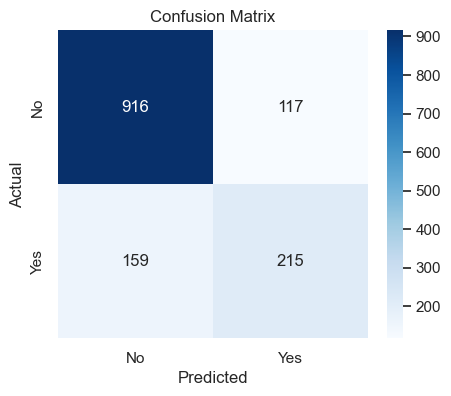

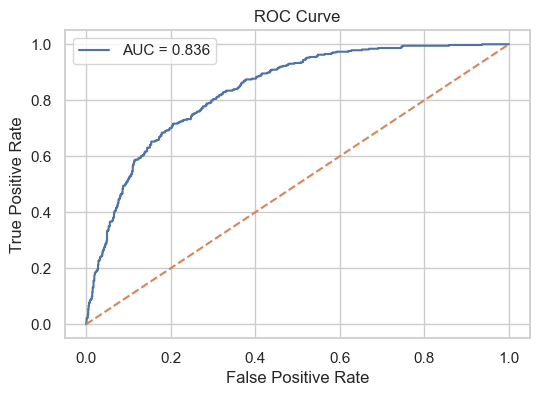

In [58]:
# confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No','Yes'], yticklabels=['No','Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Top positive coefficients (increase churn probability):


,feature,coefficient
11,InternetService_Fiber optic,0.724660
8,TotalCharges,0.632460
22,StreamingTV_Yes,0.248959
24,StreamingMovies_Yes,0.235700
10,MultipleLines_Yes,0.214014
28,PaymentMethod_Electronic check,0.182510
6,PaperlessBilling,0.142627
1,SeniorCitizen,0.071051
18,DeviceProtection_Yes,0.068397
29,PaymentMethod_Mailed check,0.034014



Top negative coefficients (decrease churn probability):


,feature,coefficient
4,tenure,-1.340230
7,MonthlyCharges,-0.845896
26,Contract_Two year,-0.597358
25,Contract_One year,-0.310502
14,OnlineSecurity_Yes,-0.137256
20,TechSupport_Yes,-0.118646
3,Dependents,-0.105459
15,OnlineBackup_No internet service,-0.087816
23,StreamingMovies_No internet service,-0.087816
12,InternetService_No,-0.087816


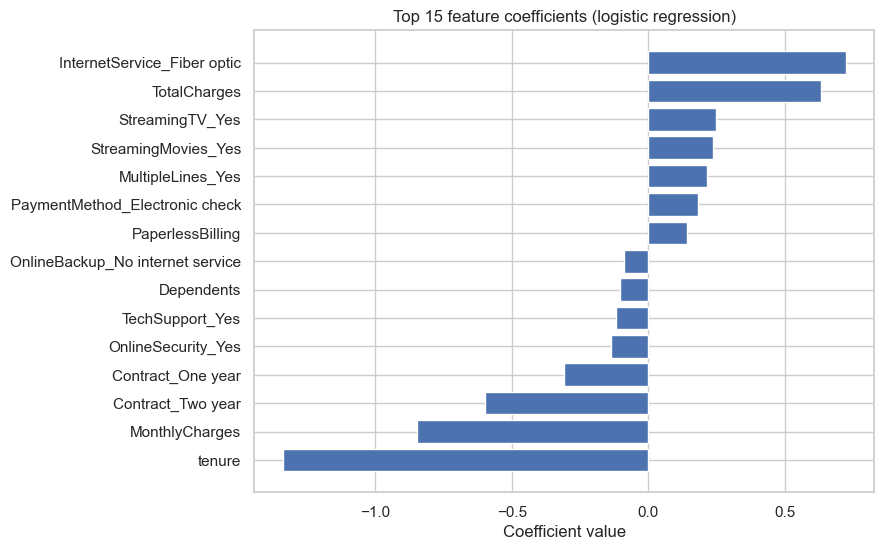

In [60]:
coef_df = (
    pd.DataFrame({
        'feature': X.columns,
        'coefficient': logreg.coef_[0]
    })
    .sort_values(by="coefficient", key=lambda x: x.abs(), ascending=False)
)


# show top 20 positive and negative
print("Top positive coefficients (increase churn probability):")
display(coef_df.sort_values('coefficient', ascending=False).head(10))
print("\nTop negative coefficients (decrease churn probability):")
display(coef_df.sort_values('coefficient', ascending=True).head(10))

# optional bar plot of top 15 (absolute)
top = coef_df.head(15).sort_values('coefficient')
plt.figure(figsize=(8,6))
plt.barh(top['feature'], top['coefficient'])
plt.title('Top 15 feature coefficients (logistic regression)')
plt.xlabel('Coefficient value')
plt.show()

In [61]:
param_grid = {'C': [0.01, 0.1, 1, 5, 10, 100], 'penalty': ['l1','l2'], 'solver': ['liblinear']}
grid = GridSearchCV(LogisticRegression(max_iter=2000), param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train_scaled, y_train)

print("Best params:", grid.best_params_)
best_model = grid.best_estimator_

# evaluate best
y_pred_best = best_model.predict(X_test_scaled)
y_proba_best = best_model.predict_proba(X_test_scaled)[:,1]
print("F1 (best):", f1_score(y_test, y_pred_best))
print("ROC AUC (best):", roc_auc_score(y_test, y_proba_best))

Best params: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
F1 (best): 0.6048502139800286
ROC AUC (best): 0.8364156628065289


In [62]:
##to save the traines scaler + model
import joblib
joblib.dump(scaler, "scaler.pkl")
joblib.dump(best_model if 'best_model' in globals() else logreg, "logreg_model.pkl")

['logreg_model.pkl']